In [1]:
from sandbox_assets import *

In [137]:
def observable(sigma, qc, basis_gates, seed=1, opt_level = 3):

    numQ = len(qc.qregs[1][:])

    sigma = sigma.to_gate()
    c_sigma = sigma.control()

    temp_circ = QuantumCircuit(numQ)
    temp_circ.append(c_sigma, [*range(0, numQ)])

    temp_circ_t = transpile(temp_circ, basis_gates = basis_gates, optimization_level = opt_level, seed_transpiler = seed)

    qc = qc.compose(temp_circ_t, [*range(0, numQ)])
    
    #c_sigma_t = transpile(c_sigma, basis_gates = basis_gates, optimization_level = opt_level, seed_transpiler = seed)

    #qubits = [*range(0, c_sigma.num_qubits)]
    
    #qc.append(c_sigma, qubits)
    #qc.append(c_sigma_t, qubits)

    #de_qc = qc.decompose()

    #t_qc = transpile(qc, basis_gates = basis_gates, optimization_level = opt_level, seed_transpiler = seed)
    
    return(qc)

/Users/noszi/Developer/python_env/env_Quantum/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/noszi/Developer/python_env/env_Quantum/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


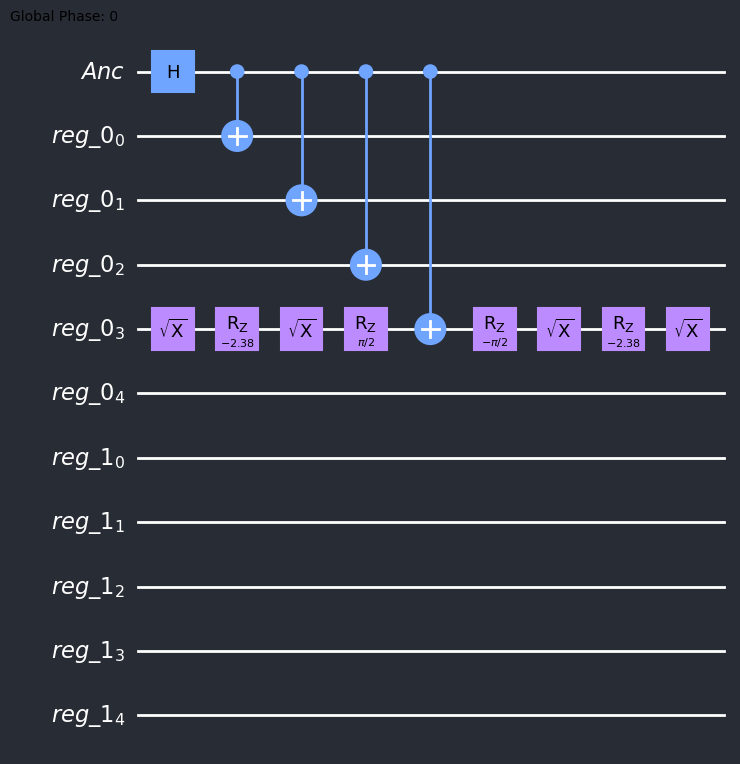

In [143]:
sigma  = QuantumCircuit(4, name = 'XX')
sigma.x(0)
sigma.x(2)
sigma.x(1)
sigma.y(3)

qc = iniQC(2,5,1)
qc.h(0)

basis_gates = ['cx', 'rz', 'id', 'sx', 'x']

qc.draw()
aha = observable(sigma = sigma, qc = qc, basis_gates = basis_gates, opt_level=3)
aha.draw()